In [7]:
from PIL import Image
import numpy as np
# from telescope_simulator import TelescopeSimulator
import pandas as pd
from pathlib import Path
import scipy
import cv2

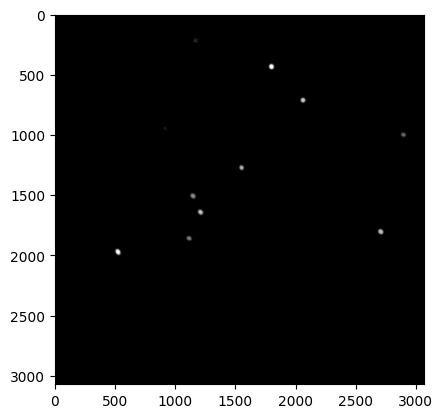

(3072, 3072)


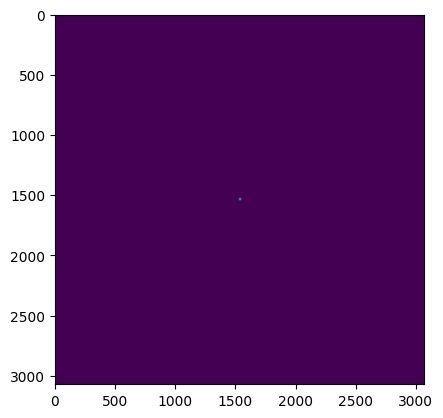

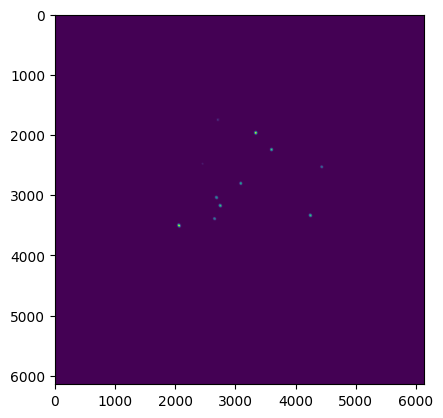

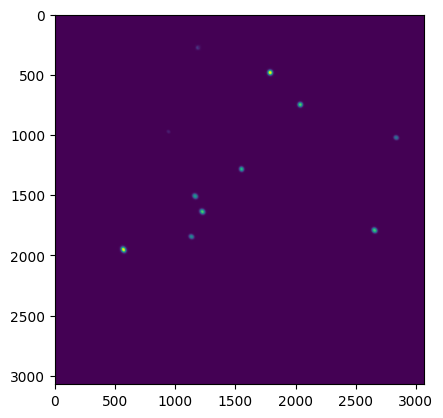

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [2]:
# physical parameters
input_image = r"./stars/BHs.png"
telescope_diameter_m = 6.5  # in meters
telescope_focal_length_m = 131.4  # in meters
wavelength = 50e-9  # in meters
CCD_pixel_size = 8e-8  # in meters
CCD_pixel_count = 3072  # The pixel width of your simulated CCD
show = True
angular_pixel_size_input_image = 0.00012

img_size = 3072
img = Image.open(input_image)
img = img.resize((img_size, img_size))
im_array = np.asarray(img)

telescope_simulator = TelescopeSimulator(im_array, telescope_diameter_m,telescope_focal_length_m,
    wavelength, angular_pixel_size_input_image, CCD_pixel_size,CCD_pixel_count, show
)

telescope_simulator.generate_image(r'stars/conv.png', show=True)

In [1]:
import pandas as pd

df = pd.DataFrame({'a':[1, 2, 3], 'b':[3, 2, 6]})
df

,a,b
0,1,3
1,2,2
2,3,6


In [2]:
df.loc[0, 'c'] = 312
df

,a,b,c
0,1,3,312.0
1,2,2,NaN
2,3,6,NaN


In [3]:
for i in range(1000):
    df.to_csv('test.csv')

In [32]:
import os
from pathlib import Path
import re

In [21]:
root_path = Path('../logs_recognition/Inclination')

In [76]:
pattern = re.compile(r'-(\d+)_')

In [97]:
for index, path in enumerate(root_path.iterdir()):
    # if index == 0:
    model_path = path / 'models'
    L = []
    for i in sorted(list(model_path.glob('*.pth.tar'))):
        # print(str(i.stem))
        lst = re.findall(pattern, str(i.stem))
        if lst:
            L.append(re.findall(pattern, str(i.stem))[0])
        else:
            L.append(1000)
    L = list(map(int, L))
    L.sort()
    del_num = len(L) - 6
    del_lst = L[:del_num]
    for epoch in del_lst:
        del_model = list(model_path.glob(f'epoch-{epoch}_*.pth.tar'))[0]
        del_model.unlink()

epoch-21_MAE-9.781.pth
epoch-22_MAE-9.689.pth
epoch-24_MAE-9.617.pth
epoch-25_MAE-9.194.pth
epoch-38_MAE-8.986.pth
final.pth
epoch-10_MAE-16.058.pth
epoch-11_MAE-11.522.pth
epoch-13_MAE-10.726.pth
epoch-15_MAE-10.311.pth
epoch-17_MAE-9.942.pth
epoch-19_MAE-9.174.pth
epoch-4_MAE-29.859.pth
epoch-5_MAE-28.648.pth
epoch-6_MAE-25.699.pth
epoch-7_MAE-18.946.pth
final.pth
epoch-11_MAE-18.118.pth
epoch-12_MAE-17.597.pth
epoch-13_MAE-15.892.pth
epoch-14_MAE-15.000.pth
epoch-15_MAE-14.499.pth
epoch-20_MAE-13.674.pth
epoch-26_MAE-13.657.pth
epoch-30_MAE-13.604.pth
epoch-31_MAE-13.429.pth
epoch-32_MAE-13.379.pth
epoch-35_MAE-13.377.pth
epoch-36_MAE-13.370.pth
epoch-39_MAE-13.312.pth
epoch-7_MAE-27.480.pth
epoch-8_MAE-21.711.pth
final.pth
epoch-18_MAE-28.820.pth
epoch-21_MAE-27.501.pth
epoch-23_MAE-26.617.pth
epoch-24_MAE-26.357.pth
epoch-25_MAE-26.090.pth
epoch-27_MAE-25.921.pth
epoch-28_MAE-25.862.pth
epoch-31_MAE-25.810.pth
epoch-32_MAE-25.794.pth
epoch-33_MAE-25.678.pth
epoch-34_MAE-25.666.pth

In [111]:
import pandas as pd
import numpy as np
import time

df = pd.DataFrame({'a':[], 'b':[]})
df.to_csv('test.csv')

In [112]:
for i in range(10):
    a = np.random.uniform(0, 1)
    b = np.random.uniform(0, 1)
    df_temp = pd.DataFrame({'a':[a], 'b':[b]})
    df_temp.to_csv('test.csv', mode='a', header=False)
    time.sleep(0.4)

In [113]:
import torch

In [117]:
def angle_loss(output, target):
    output_angle = output * torch.pi / 180
    target_angle = target * torch.pi / 180
    loss = torch.sqrt((torch.cos(output_angle) - torch.cos(target_angle))**2 + \
                      (torch.sin(output_angle) - torch.sin(target_angle))**2)
    return loss

In [123]:
out = torch.tensor([0])
tar = torch.tensor([360])
angle_loss(out, tar)

tensor([1.7485e-07])

In [126]:
from pathlib import Path
img_path = Path('../tele_datasets/224')
len(set(img_path.iterdir()))

9006

In [1]:
from pathlib import Path

In [14]:
# root = Path('../logs_recognition/Inclination_PA')
# for date_path in root.iterdir():
#     models = list(date_path.glob('models/epoch-*inc.pth.tar'))
#     models.sort()
#     for i in models[:-1]:
#         i.unlink()
    
#     models = list(date_path.glob('models/epoch-*PA.pth.tar'))
#     models.sort()
#     for i in models[:-1]:
#         i.unlink()

In [16]:
# root = Path('../logs_recognition/Inclination_PA')
# for date_path in root.iterdir():
#     models = list(date_path.glob('models/epoch-*.pth.tar'))
#     models.sort()
#     print(models)
        

In [22]:
df = pd.read_excel('../logs_recognition/results.xlsx')
df.set_index('date', inplace=True)
df

,Model_name,MAE,Batch_size,Resolution,Dropout,lr,No. training,No. testing,In size,angular_pixel_size_input_image,Training Epoch,Engine,Loss Function,More,para,MAE inc,MAE PA
date,,,,,,,,,,,,,,,,,
2024-01-06_12-06-06,EfficientNet-B0,1.743986,64,224,0.5,0.00005,1437.0,360.0,224.0,NaN,NaN,Tensorflow,mae,NaN,NaN,NaN,NaN
2024-01-06_12-25-00,EfficientNet-B0,2.401100,128,224,0.5,0.00005,1437.0,360.0,224.0,NaN,NaN,Tensorflow,mae,NaN,NaN,NaN,NaN
2024-01-06_12-36-42,EfficientNet-B0,1.288299,128,224,0.4,0.00002,1437.0,360.0,224.0,NaN,NaN,Tensorflow,mae,NaN,NaN,NaN,NaN
2024-01-06_13-05-25,EfficientNet-B0,1.010098,128,224,0.3,0.00002,1437.0,360.0,224.0,NaN,NaN,Tensorflow,mae,NaN,NaN,NaN,NaN
2024-01-06_13-39-45,EfficientNet-B0,0.942167,128,224,0.2,0.00002,1437.0,360.0,224.0,NaN,NaN,Tensorflow,mae,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-08_20-35-39,EfficientNet-B1,NaN,300,240,0.5,0.00100,NaN,NaN,NaN,0.00055,40.0,PyTorch,<function angle_loss at 0x7fdfbeaf79d0>,NaN,"Inc, PA",10.955883,13.642080
2024-02-08_21-14-51,EfficientNet-B1,NaN,300,240,0.5,0.00100,NaN,NaN,NaN,0.00065,40.0,PyTorch,<function angle_loss at 0x7f051755c820>,NaN,"Inc, PA",11.206594,15.166001
2024-02-08_21-41-27,EfficientNet-B1,NaN,300,240,0.5,0.00100,NaN,NaN,NaN,0.00075,40.0,PyTorch,<function angle_loss at 0x7f051755c820>,NaN,"Inc, PA",11.736953,13.991319


In [24]:
# convert to datetime
df.index = pd.to_datetime(df.index, format=r"%Y-%m-%d_%H-%M-%S")

In [34]:
df_today = df.loc['2024-02-08', :].copy()
df_today.reset_index(inplace=True)
df_today['date'] = df_today.date.dt.strftime(r"%Y-%m-%d_%H-%M-%S")
df_today.head()

,date,Model_name,MAE,Batch_size,Resolution,Dropout,lr,No. training,No. testing,In size,angular_pixel_size_input_image,Training Epoch,Engine,Loss Function,More,para,MAE inc,MAE PA
0,2024-02-08_00-31-48,EfficientNet-B1,100.0,256,240,0.5,0.001,NaN,NaN,NaN,0.00165,1.0,PyTorch,<function angle_loss at 0x7fc40fe49790>,NaN,"Inc, PA",NaN,NaN
1,2024-02-08_01-04-18,EfficientNet-B1,NaN,256,240,0.5,0.001,NaN,NaN,NaN,0.00165,1.0,PyTorch,<function angle_loss at 0x7ff630bb8790>,NaN,"Inc, PA",45.496842,100.0
2,2024-02-08_01-41-28,EfficientNet-B1,NaN,256,240,0.5,0.001,NaN,NaN,NaN,0.00165,1.0,PyTorch,<function angle_loss at 0x7f224fc23790>,NaN,"Inc, PA",45.226460,100.0
3,2024-02-08_01-44-02,EfficientNet-B1,NaN,256,240,0.5,0.001,NaN,NaN,NaN,0.00165,1.0,PyTorch,<function angle_loss at 0x7f358dd77790>,NaN,"Inc, PA",44.026576,100.0
4,2024-02-08_01-46-18,EfficientNet-B1,NaN,256,240,0.5,0.001,NaN,NaN,NaN,0.00165,1.0,PyTorch,<function angle_loss at 0x7fc5b4023790>,NaN,"Inc, PA",45.448527,100.0


In [38]:
log_path = Path('../logs_recognition/Inclination_PA')
for date in df_today.date:
    date_path = log_path / date
    models = list(date_path.glob('*.p*'))
    models.sort()
    print(models)

[]
[]
[PosixPath('../logs_recognition/Inclination_PA/2024-02-08_01-41-28/fits.png')]
[PosixPath('../logs_recognition/Inclination_PA/2024-02-08_01-44-02/fits.png')]
[PosixPath('../logs_recognition/Inclination_PA/2024-02-08_01-46-18/fits.png')]
[PosixPath('../logs_recognition/Inclination_PA/2024-02-08_10-50-47/fits.png')]
[PosixPath('../logs_recognition/Inclination_PA/2024-02-08_11-19-24/fits.png')]
[PosixPath('../logs_recognition/Inclination_PA/2024-02-08_11-45-34/fits.png')]
[PosixPath('../logs_recognition/Inclination_PA/2024-02-08_12-11-51/fits.png')]
[PosixPath('../logs_recognition/Inclination_PA/2024-02-08_12-37-17/fits.png')]
[PosixPath('../logs_recognition/Inclination_PA/2024-02-08_13-03-37/fits.png')]
[PosixPath('../logs_recognition/Inclination_PA/2024-02-08_13-28-26/fits.png')]
[PosixPath('../logs_recognition/Inclination_PA/2024-02-08_13-54-19/fits.png')]
[PosixPath('../logs_recognition/Inclination_PA/2024-02-08_14-19-57/fits.png')]
[PosixPath('../logs_recognition/Inclination_PA

In [41]:
images = Path('imaegs_paper')
for date in df_today.date:
    date_path = log_path / date
    imgs = list(date_path.glob('*.p*'))
    if imgs:
        date_path = images / date
        date_path.mkdir(parents=True ,exist_ok=True)
        # copy files to date_path
        for img in imgs:
            scr = img
            dst = date_path / img.name
            dst.write_bytes(scr.read_bytes())
        # print(models)

In [2]:
all_path = Path('/home/lc/DeepShadow/')
all_path.glob('*:*.csv')

<generator object Path.glob at 0x7fa3a7994f20>

In [3]:
all_path.absolute()

PosixPath('/home/lc/DeepShadow')

In [9]:
for i in all_path.rglob('acc:*.csv'):
    i.rename(i.parent / i.name.replace(':' ,'-'))

In [21]:
for i in all_path.glob('**/*_1[5-7]-[0-4][1-3]*/*.png'):
    print(i)

/home/lc/DeepShadow/logs_classification/2024-02-08_17-41-53/confusion.png
/home/lc/DeepShadow/spare/imaegs_paper/2024-02-08_17-02-08/fits.png
/home/lc/DeepShadow/spare/imaegs_paper/2024-02-08_15-12-38/fits.png
/home/lc/DeepShadow/logs_recognition/Inclination_PA/2024-02-08_17-02-08/fits.png
/home/lc/DeepShadow/logs_recognition/Inclination_PA/2024-02-08_15-12-38/fits.png
/home/lc/DeepShadow/logs_recognition/Inclination/2024-01-27_16-01-07/fit.png
/home/lc/DeepShadow/logs_recognition/PA/2024-02-06_17-23-53/fit.png


In [6]:
for i in all_path.rglob('acc:*.csv'):
    print(i.parent)

/home/lc/DeepShadow/logs_recognition/Inclination_PA/2024-02-09_04-17-53
/home/lc/DeepShadow/logs_recognition/Inclination_PA/2024-02-09_00-09-34
/home/lc/DeepShadow/logs_recognition/Inclination_PA/2024-02-09_03-06-50
/home/lc/DeepShadow/logs_recognition/Inclination_PA/2024-02-09_00-41-09
/home/lc/DeepShadow/logs_recognition/Inclination_PA/2024-02-09_01-54-07
/home/lc/DeepShadow/logs_recognition/Inclination_PA/2024-02-09_08-55-08
/home/lc/DeepShadow/logs_recognition/Inclination_PA/2024-02-09_07-48-06
/home/lc/DeepShadow/logs_recognition/Inclination_PA/2024-02-09_05-32-37
/home/lc/DeepShadow/logs_recognition/Inclination_PA/2024-02-09_06-40-10


# SNR

In [20]:
img_path = Path(r'..\tele_datasets\stars10_BH1_num1000_rect_wl1.000e-07_D6.50_F131.4_AS1.00e-04_BHSize64-75\train\images\BHs_0a85a10d-90e5-47d9-8ae3-7a7529b1e65c.png')
img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
img.shape

(1024, 1024)

In [21]:
import numpy as np
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    print(m, sd)
    return np.where(sd == 0, 0, m/sd)

In [22]:
snr = signaltonoise(img, axis=None)
snr

0.13956546783447266 3.6300834386092014


array(0.0384469)